In [58]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import numpy.linalg as npl
from scipy.optimize import minimize
import math as math
from itertools import combinations
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import WhiteKernel
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
import csv
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import griddata
from scipy import interpolate
from scipy.stats import gamma, halfnorm
from tqdm import tqdm
import corner
import emcee
from emcee.moves import WalkMove,DEMove
from scipy.stats import uniform

In [59]:
columns = ['Rational Quadratic', 'ExpSineSquared', 'Laplacian', 'RBF','Matern']
rows = ["RMSE", "MAE", "R²", "Adjusted R²", "Figure of Measurement"]
fits = ["WhiteKernel No Error","White Kernel Error","Point Estimates","MCMC Averaging","Peak Param","Mean Param","Monte Carlo"]
WhiteKernelnoKnowledgeMetrics = pd.read_csv("WhiteKernelNoKnowledgeMetrics.csv", names = columns)
WhiteKernelWithErrorKNowledgeMetrics = pd.read_csv("WhiteKernelWithErrorKnowledgeMetrics.csv", names = columns)
PointEstimateMetrics = pd.read_csv("PointEstimateMetrics.csv",names=columns)
mcmcMetrics = pd.read_csv("MCMCMetrics.csv", names=columns)
meanMetrics = pd.read_csv("MeanMetrics.csv", names=columns)
peakMetrics = pd.read_csv("PeakMetrics.csv", names=columns)
MonteCarloMetrics = pd.read_csv("MonteCarloSamplingMetrics.csv",names = columns)

In [60]:
metrics = [WhiteKernelnoKnowledgeMetrics,WhiteKernelWithErrorKNowledgeMetrics,PointEstimateMetrics,mcmcMetrics,meanMetrics,peakMetrics,MonteCarloMetrics]

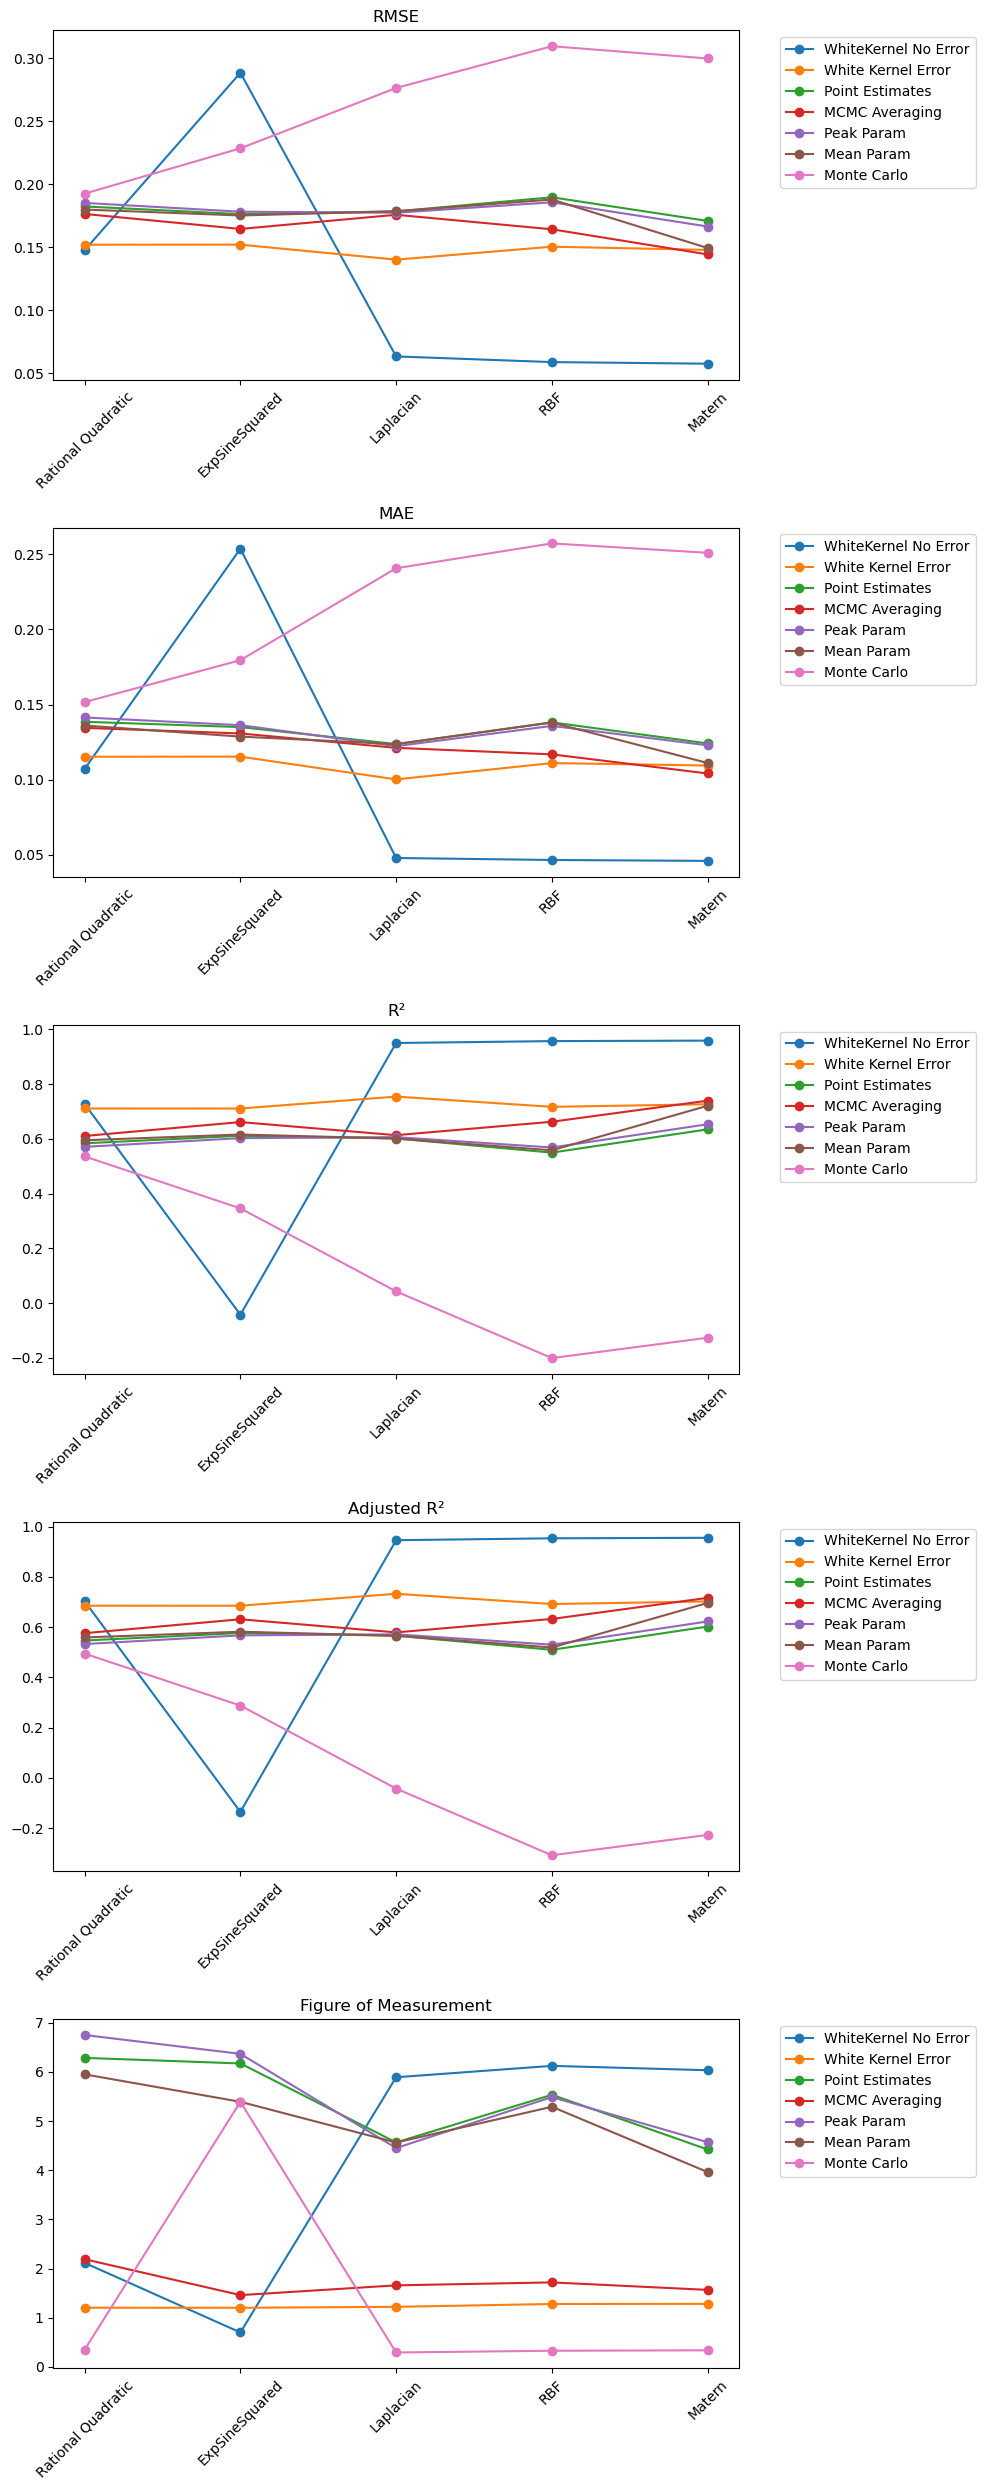

In [61]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
fig, axes = plt.subplots(len(rows), 1, figsize=(10, 25))
x = range(len(columns))
x_ticks = np.arange(len(columns))
for i, ax in enumerate(axes):
    for j in range(len(metrics)):
        ax.plot(x,metrics[j].loc[i],'-o', color=colors[j], label=fits[j])
    ax.set_xticks(x_ticks,columns, rotation=45)
    ax.set_title(rows[i])
    ax.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()

### Removing White Kernel no error and Monte Carlo

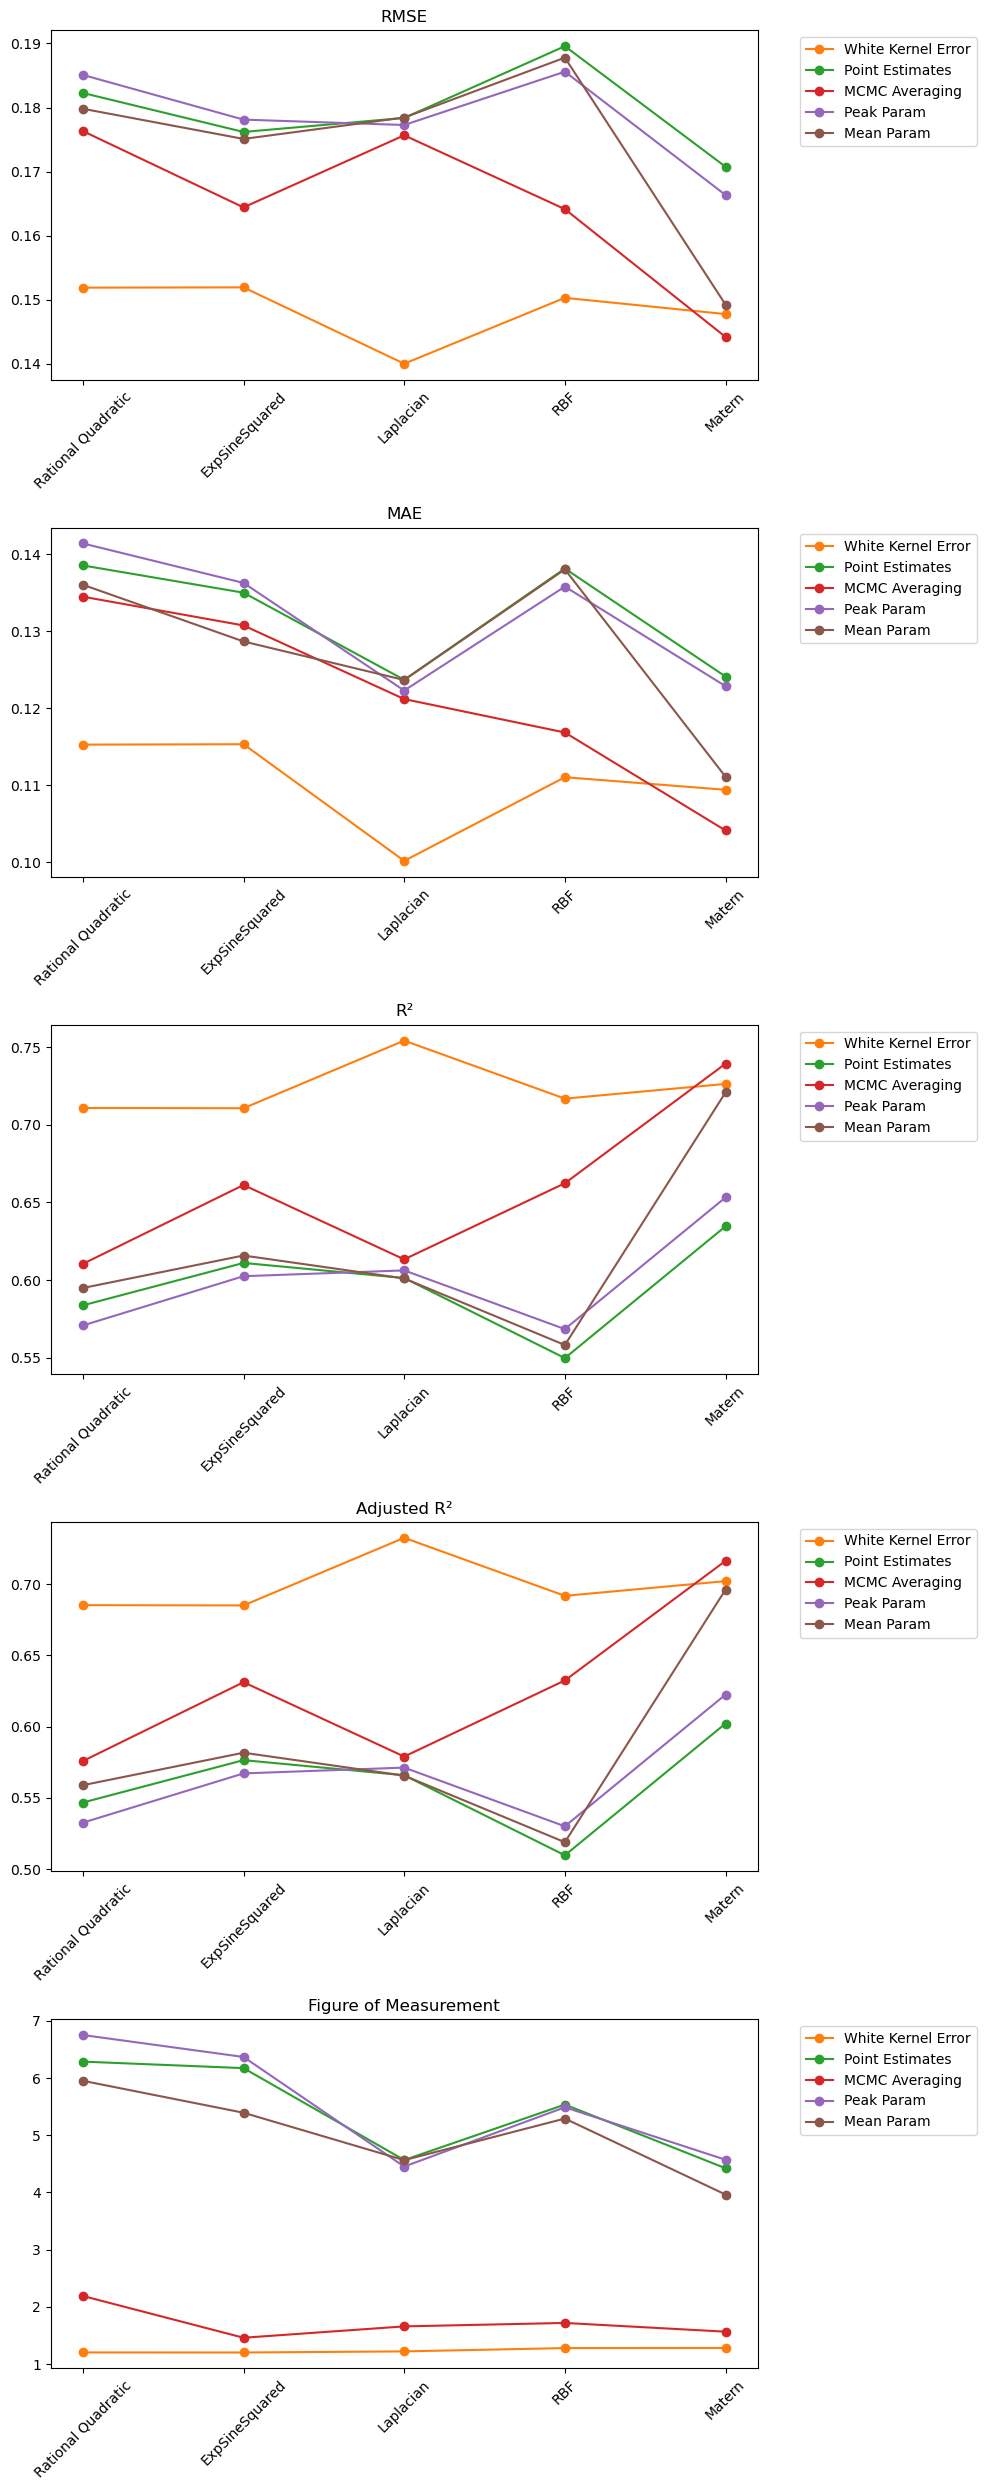

In [62]:
columns = ['Rational Quadratic', 'ExpSineSquared', 'Laplacian', 'RBF','Matern']
rows = ["RMSE", "MAE", "R²", "Adjusted R²", "Figure of Measurement"]
fits = ["White Kernel Error","Point Estimates","MCMC Averaging","Peak Param","Mean Param"]
metrics = [WhiteKernelWithErrorKNowledgeMetrics,PointEstimateMetrics,mcmcMetrics,meanMetrics,peakMetrics]
colors = [ '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
fig, axes = plt.subplots(len(rows), 1, figsize=(10, 25))
x = range(len(columns))
x_ticks = np.arange(len(columns))
for i, ax in enumerate(axes):
    for j in range(len(metrics)):
        ax.plot(x,metrics[j].loc[i],'-o', color=colors[j], label=fits[j])
    ax.set_xticks(x_ticks,columns, rotation=45)
    ax.set_title(rows[i])
    ax.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()